In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [6]:
del train['Alley']
del test['Alley']

In [7]:
del train['PoolQC']
del test['PoolQC']

In [8]:
del train['MiscFeature']
del test['MiscFeature']

In [9]:
del train['Fence']
del test['Fence']

In [10]:
del train['FireplaceQu']
del test['FireplaceQu']

In [11]:
del train['Id']
#del test['Id']

In [12]:
del train['PoolArea']
del test['PoolArea']

In [13]:
del train['MoSold']
del test['MoSold']

In [14]:
del train['3SsnPorch']
del test['3SsnPorch']

In [15]:
del train['BsmtFinSF2']
del test['BsmtFinSF2']

In [16]:
del train['BsmtHalfBath']
del test['BsmtHalfBath']

In [17]:
del train['MiscVal']
del test['MiscVal']

In [18]:
del train['LowQualFinSF']
del test['LowQualFinSF']

In [19]:
del train['YrSold']
del test['YrSold']

In [20]:
del train['OverallCond']
del test['OverallCond']

In [21]:
del train['MSSubClass']
del test['MSSubClass']

In [22]:
del train['Functional']
del test['Functional']
del train['Heating']
del test['Heating']
del train['Condition2']
del test['Condition2']
del train['Street']
del test['Street']
del train['LandSlope']
del test['LandSlope']
del train['Utilities']
del test['Utilities']
del train['MasVnrType']
del test['MasVnrType']
del train['BsmtQual']
del test['BsmtQual']
del train['BsmtCond']
del test['BsmtCond']
del train['BsmtExposure']
del test['BsmtExposure']
del train['BsmtFinType1']
del test['BsmtFinType1']
del train['BsmtFinType2']
del test['BsmtFinType2']
del train['Electrical']
del test['Electrical']
del train['GarageType']
del test['GarageType']
del train['GarageFinish']
del test['GarageFinish']
del train['GarageQual']
del test['GarageQual']
del train['GarageCond']
del test['GarageCond']

In [23]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])

In [24]:
corr = numeric_data.corr()

In [25]:
print (corr['SalePrice'].sort_values(ascending=False), '\n') #top 15 values
#print ('----------------------')
#print (corr['SalePrice'].sort_values(ascending=False)) #last 5 values`

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [26]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSZoning         1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
KitchenQual      1460 non-null object
PavedDrive       1460 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
dtypes: object(21)
memory usage: 239.6+ KB


/home/rafee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<module 'matplotlib.pyplot' from '/home/rafee/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

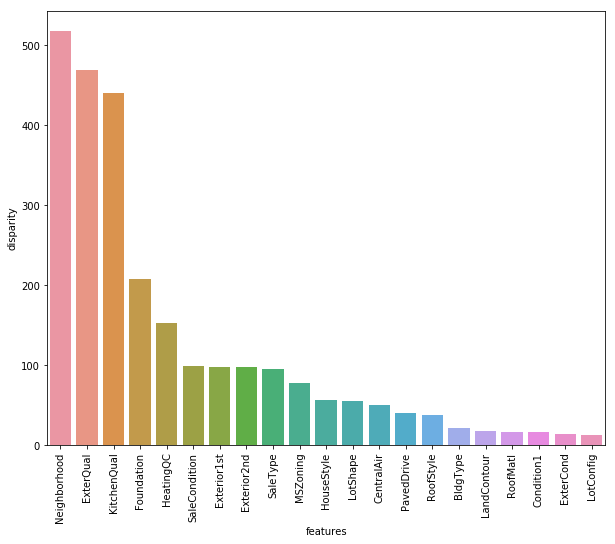

In [27]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

In [28]:
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,2,548,Y,0,61,0,0,WD,Normal,208500
1,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,2,460,Y,298,0,0,0,WD,Normal,181500
2,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,2,608,Y,0,42,0,0,WD,Normal,223500
3,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,...,3,642,Y,0,35,272,0,WD,Abnorml,140000
4,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,...,3,836,Y,192,84,0,0,WD,Normal,250000
5,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,1Fam,1.5Fin,...,2,480,Y,40,30,0,0,WD,Normal,143000
6,RL,75.0,10084,Reg,Lvl,Inside,Somerst,Norm,1Fam,1Story,...,2,636,Y,255,57,0,0,WD,Normal,307000
7,RL,NaN,10382,IR1,Lvl,Corner,NWAmes,PosN,1Fam,2Story,...,2,484,Y,235,204,228,0,WD,Normal,200000
8,RM,51.0,6120,Reg,Lvl,Inside,OldTown,Artery,1Fam,1.5Fin,...,2,468,Y,90,0,205,0,WD,Abnorml,129900
9,RL,50.0,7420,Reg,Lvl,Corner,BrkSide,Artery,2fmCon,1.5Unf,...,1,205,Y,0,4,0,0,WD,Normal,118000


In [29]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [30]:
train

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,2,548,Y,0,61,0,0,WD,Normal,208500
1,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,2,460,Y,298,0,0,0,WD,Normal,181500
2,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,2,608,Y,0,42,0,0,WD,Normal,223500
3,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,...,3,642,Y,0,35,272,0,WD,Abnorml,140000
4,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,...,3,836,Y,192,84,0,0,WD,Normal,250000
5,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,1Fam,1.5Fin,...,2,480,Y,40,30,0,0,WD,Normal,143000
6,RL,75.0,10084,Reg,Lvl,Inside,Somerst,Norm,1Fam,1Story,...,2,636,Y,255,57,0,0,WD,Normal,307000
7,RL,NaN,10382,IR1,Lvl,Corner,NWAmes,PosN,1Fam,2Story,...,2,484,Y,235,204,228,0,WD,Normal,200000
8,RM,51.0,6120,Reg,Lvl,Inside,OldTown,Artery,1Fam,1.5Fin,...,2,468,Y,90,0,205,0,WD,Abnorml,129900
9,RL,50.0,7420,Reg,Lvl,Corner,BrkSide,Artery,2fmCon,1.5Unf,...,1,205,Y,0,4,0,0,WD,Normal,118000


In [31]:
c = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','HeatingQC','CentralAir','KitchenQual','PavedDrive','SaleType','SaleCondition']
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
for k in c:
    train[k] = labelencoder_X_1.fit_transform(train[k])
    

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 48 columns):
MSZoning         1456 non-null int64
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null int64
LotConfig        1456 non-null int64
Neighborhood     1456 non-null int64
Condition1       1456 non-null int64
BldgType         1456 non-null int64
HouseStyle       1456 non-null int64
OverallQual      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null int64
RoofMatl         1456 non-null int64
Exterior1st      1456 non-null int64
Exterior2nd      1456 non-null int64
MasVnrArea       1448 non-null float64
ExterQual        1456 non-null int64
ExterCond        1456 non-null int64
Foundation       1456 non-null int64
BsmtFinSF1       1456 non-null int64
BsmtUnfSF        1456 non-null int64
TotalBsmtSF      1456 non-null int64
H

In [33]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [34]:
mis = train.isnull().sum()/len(train)
mis = mis[mis > 0]
mis.sort_values(inplace=True)
mis

MasVnrArea     0.005495
GarageYrBlt    0.055632
LotFrontage    0.177885
dtype: float64

In [35]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [36]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1980.0)

In [37]:
train['LotFrontage'] = train['LotFrontage'].fillna(60.0)

In [38]:
train[train.isnull().any(axis=1)]

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice


In [39]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'KitchenQual',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [40]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

In [41]:
test['LotFrontage'] = test['LotFrontage'].fillna(60.0)

In [42]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(1980.0)

In [43]:
test['Exterior1st'] = test['Exterior1st'].fillna('VinylSd')

In [44]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('VinylSd')

In [45]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(100.0)

In [46]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(350.5)

In [47]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(460)

In [48]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(980.0)

In [49]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0.42)

In [50]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [51]:
test['GarageCars'] = test['GarageCars'].fillna(2.0)

In [52]:
test['GarageArea'] = test['GarageArea'].fillna(480)

In [53]:
test['SaleType'] = test['SaleType'].fillna('WD')

In [54]:
for k in c:
    test[k] = labelencoder_X_1.fit_transform(test[k])

In [55]:
y = train[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [56]:
del train['SalePrice']

In [57]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1.5, missing=None,
       n_estimators=7200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=42, silent=1, subsample=0.2)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 47 columns):
MSZoning         1456 non-null int64
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null int64
LotConfig        1456 non-null int64
Neighborhood     1456 non-null int64
Condition1       1456 non-null int64
BldgType         1456 non-null int64
HouseStyle       1456 non-null int64
OverallQual      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null int64
RoofMatl         1456 non-null int64
Exterior1st      1456 non-null int64
Exterior2nd      1456 non-null int64
MasVnrArea       1456 non-null float64
ExterQual        1456 non-null int64
ExterCond        1456 non-null int64
Foundation       1456 non-null int64
BsmtFinSF1       1456 non-null int64
BsmtUnfSF        1456 non-null int64
TotalBsmtSF      1456 non-null int64
H

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 48 columns):
Id               1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
LotConfig        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
MasVnrArea       1459 non-null float64
ExterQual        1459 non-null int64
ExterCond        1459 non-null int64
Foundation       1459 non-null int64
BsmtFinSF1       1459 non-null float64
BsmtUnfSF        1459 non-null float

In [60]:
j = test['Id']
del test['Id']
y_pred_xgb = regr.predict(test)

#submit this prediction and get the score
pred1 = pd.DataFrame({'Id': j, 'SalePrice': y_pred_xgb})


In [61]:
pred1.to_csv('xgb0.csv', header=True, index=False)

In [62]:
pred1.head()

,Id,SalePrice
0,1461,115724.359375
1,1462,171287.031250
2,1463,190995.546875
3,1464,193735.859375
4,1465,183388.031250


In [65]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr0 = Lasso(alpha=best_alpha, max_iter=30000)
regr0.fit(train, y)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=30000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
y_pred_lasso = regr0.predict(test)
pred1 = pd.DataFrame({'Id': j, 'SalePrice': y_pred_lasso})
pred1.to_csv('lasso_model0.csv', header=True, index=False)